In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import const
import functions
from types import SimpleNamespace
from subprocess import check_output
from scipy.optimize import curve_fit
from helper import *


In [2]:
# read data
run  = 1
data = np.load(os.path.join('..', 'KNexplosions', 'runhr%d.npz' % run))
data = SimpleNamespace(**data)
nstep, nzone = data.r.shape
title_str = r"$M_{\rm ej} = %.2f~M_\odot, v_{\rm ej} = %.2f\times 10^9~{\rm cm/s}$, $n_{\rm CGM} = %.2f~{\rm cm^{-3}}$" % (data.Mej/const.M_sol, data.vej/1e9, data.nH_cgm)


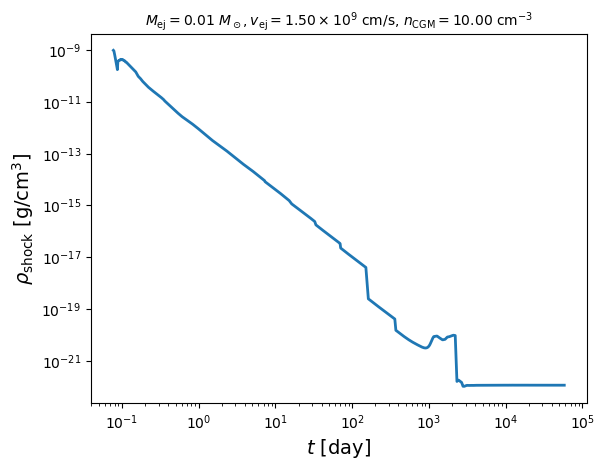

In [41]:
plt.plot(data.time/const.day, data.rho_shock, lw=2)

plt.title(title_str, fontsize=10)
plt.xlabel(r'$t$ [${\rm day}$]', fontsize=14)
plt.ylabel(r'$\rho_{\rm shock}$ [${\rm g/cm^3}$]', fontsize=14)

plt.xscale('log')
plt.yscale('log')

#save_fig('rho_shock')


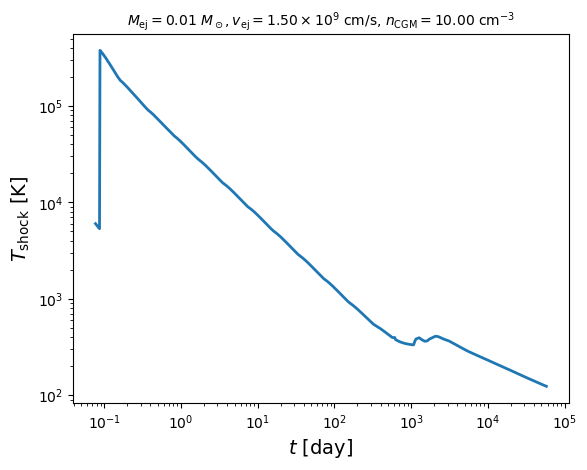

In [40]:
plt.plot(data.time/const.day, data.temp_shock, lw=2)

plt.title(title_str, fontsize=10)
plt.xlabel(r'$t$ [${\rm day}$]', fontsize=14)
plt.ylabel(r'$T_{\rm shock}$ [${\rm K}$]', fontsize=14)

plt.xscale('log')
plt.yscale('log')



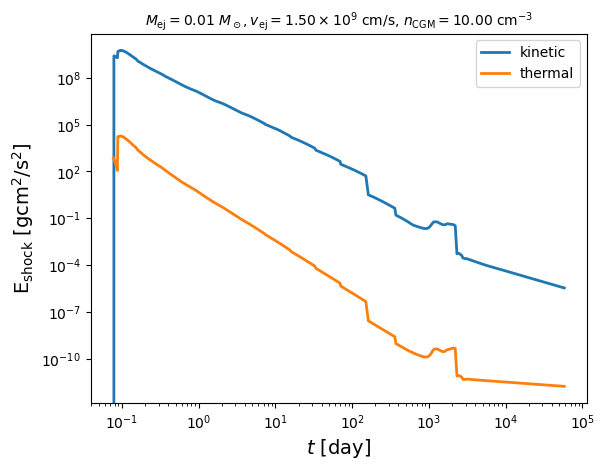

In [39]:
Ekin_shock = data.rho_shock*data.vel_shock**2
Eth_shock  = 3/2*data.rho_shock*const.N_A*const.k_B*data.temp_shock

plt.plot(data.time/const.day, Ekin_shock, lw=2, label='kinetic')
plt.plot(data.time/const.day, Eth_shock, lw=2,  label='thermal')

plt.title(title_str, fontsize=10)
plt.xlabel(r'$t$ [${\rm day}$]', fontsize=14)
plt.ylabel(r'${\rm E}_{\rm shock}$ [${\rm g cm^2 / s^2}$]', fontsize=14)

plt.xscale('log')
plt.yscale('log')

plt.legend()


Text(0, 0.5, '$B_{\\rm shock}$ [${\\rm G}$]')

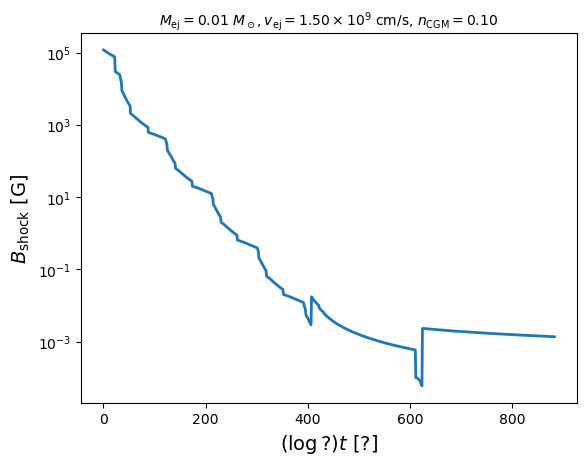

In [10]:
beta = 1
B_shock = np.sqrt(4*np.pi*beta*KE_shock)

plt.plot(B_shock, lw=2)
plt.yscale('log')

plt.title(title_str, fontsize=10)
plt.xlabel(r'($\log$?)$t$ [?]', fontsize=14)
plt.ylabel(r'$B_{\rm shock}$ [${\rm G}$]', fontsize=14)

#save_fig('B_shock')


Text(0, 0.5, '$v$ [$c$]')

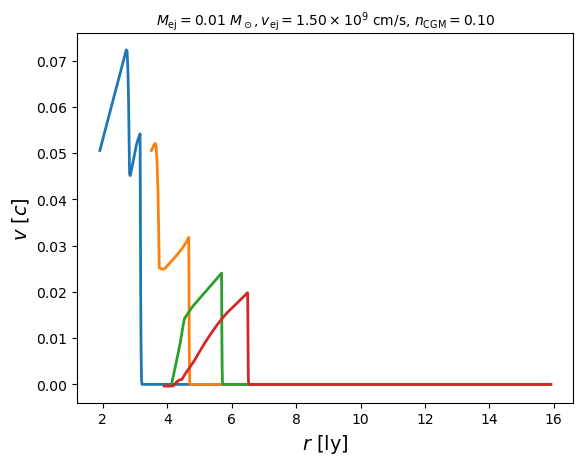

In [248]:
plt.plot(data.radius[500]/const.ly, data.vel[500]/const.c, lw=2)
plt.plot(data.radius[600]/const.ly, data.vel[600]/const.c, lw=2)
plt.plot(data.radius[700]/const.ly, data.vel[700]/const.c, lw=2)
plt.plot(data.radius[800]/const.ly, data.vel[800]/const.c, lw=2)

plt.title(title_str, fontsize=10)
plt.xlabel(r'$r$ [${\rm ly}$]', fontsize=14)
plt.ylabel(r'$v$ [$c$]', fontsize=14)


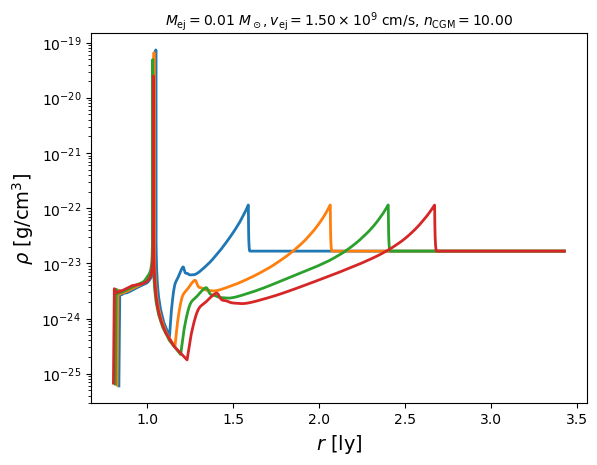

In [262]:
plt.plot(data.radius[500]/const.ly, data.rho[500], lw=2)
plt.plot(data.radius[600]/const.ly, data.rho[600], lw=2)
plt.plot(data.radius[700]/const.ly, data.rho[700], lw=2)
plt.plot(data.radius[800]/const.ly, data.rho[800], lw=2)

plt.title(title_str, fontsize=10)
plt.xlabel(r'$r$ [${\rm ly}$]', fontsize=14)
plt.ylabel(r'$\rho$ [${\rm g/cm^3}$]', fontsize=14)
plt.yscale('log')
